In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Import the three datasets

In [2]:
# Import Movie dataset
df_movie = pd.read_csv("movies.dat", sep="::", names=["MovieID", "Title", "Genre"], engine='python')

In [3]:
# Look at first 5 observations
df_movie.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Import ratings dataset
df_ratings = pd.read_csv("ratings.dat", sep="::", names=["UserID","MovieID","Rating","Timestamp"],engine='python')

In [5]:
# Look at first 5 observations
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
# Import users dataset
df_users = pd.read_csv("users.dat", sep="::", names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python')

In [7]:
# Look at first 5 observations
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
# Look at shape of each dataframe
print(df_movie.shape)
print(df_ratings.shape)
print(df_users.shape)

(3883, 3)
(1000209, 4)
(6040, 5)


# Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating.

In [9]:
# Create masterdataset
df_master = df_movie.merge(df_ratings, on='MovieID', how='inner')

In [10]:
df_master.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [11]:
df_master.shape

(1000209, 6)

In [12]:
# Merge master dataset and user dataset
df_master = df_master.merge(df_users, on='UserID', how='inner')

In [13]:
df_master.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [14]:
df_master.shape

(1000209, 10)

# Explore the datasets using visual representations (graphs or tables)

In [15]:
# User with different age group
df_master['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

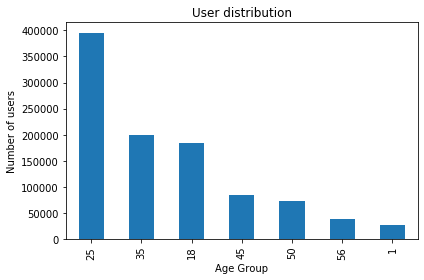

In [16]:
# Plot for users with different age group
df_master['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age Group")
plt.ylabel("Number of users")
plt.title('User distribution')
plt.tight_layout()
plt.show()

In [17]:
# User ratings for toystory movie
toy_story = df_master[df_master['Title'].str.contains('Toy Story') == True]

In [18]:
toy_story

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [19]:
toy_story.groupby(['Title','Rating']).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

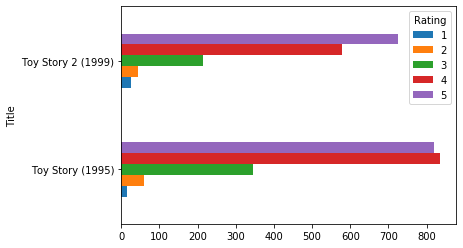

In [20]:
toy_story.groupby(['Title','Rating']).size().unstack().fillna(0).plot(kind='barh', stacked=False, legend=True)

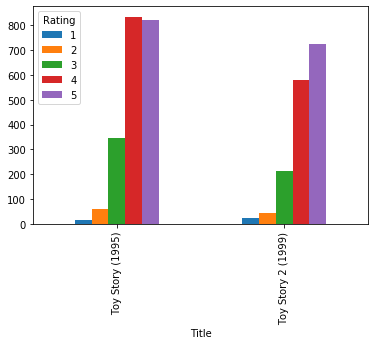

In [21]:
toy_story.groupby(['Title','Rating']).size().unstack().fillna(0).plot(kind='bar', stacked=False, legend=True)

In [22]:
# Top 25 movies by viewership rating
df_top25 = df_master.groupby(['Title']).size().sort_values(ascending=False)[:25]
df_top25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

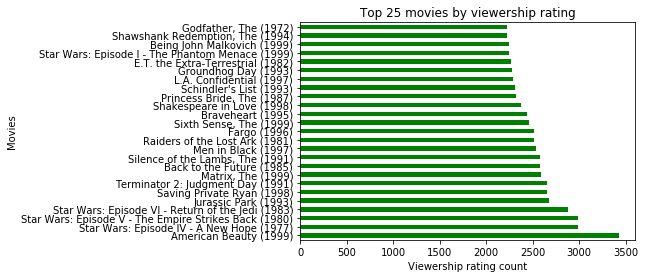

In [23]:
df_top25.plot(kind='barh', color=['g'])
plt.xlabel('Viewership rating count')
plt.ylabel('Movies')
plt.title('Top 25 movies by viewership rating')
plt.show()

In [24]:
# Find the ratings for all the movies reviewed by for a particular user of user id = 2696
userid_2696 = df_master[df_master['UserID'] == 2696]

In [25]:
userid_2696

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


In [26]:
userid_2696.shape

(20, 10)

# Feature Engineering

In [27]:
# Findout all unique Genre
df_genre = df_master['Genre'].str.split('|')
df_genre

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genre, Length: 1000209, dtype: object

In [28]:
list_of_Genres = set()

In [29]:
for genre in df_genre:
    list_of_Genres = list_of_Genres.union(set(genre))

In [30]:
list_of_Genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [31]:
ratingsOneHot = df_master["Genre"].str.get_dummies("|")

In [32]:
ratingsOneHot

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1000206,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1000207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
ratingsOneHot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [34]:
type(ratingsOneHot)

pandas.core.frame.DataFrame

In [35]:
df_master = pd.concat([df_master, ratingsOneHot], axis=1)

In [36]:
df_master.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [37]:
df_master.columns

Index(['MovieID', 'Title', 'Genre', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

# Determine the features affecting the ratings of any particular movie.


In [38]:
# First remove year from Title and create new column year
df_master[['title', 'Year']] = df_master['Title'].str.extract("(.)\s\((.\d+)",expand=True)


In [39]:
df_master.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,y,1995
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,1,0,0,0,0,s,1995
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,3,1995
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,1,0,0,0,e,1977
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,1,0,t,1993


In [40]:
df_master.drop(columns=['title'], inplace=True)

In [41]:
df_master.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,1,0,1,0,0,0,0,1995
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,0,1,0,0,0,1977
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,1,0,1993


In [42]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   Genre        1000209 non-null  object
 3   UserID       1000209 non-null  int64 
 4   Rating       1000209 non-null  int64 
 5   Timestamp    1000209 non-null  int64 
 6   Gender       1000209 non-null  object
 7   Age          1000209 non-null  int64 
 8   Occupation   1000209 non-null  int64 
 9   Zip-code     1000209 non-null  object
 10  Action       1000209 non-null  int64 
 11  Adventure    1000209 non-null  int64 
 12  Animation    1000209 non-null  int64 
 13  Children's   1000209 non-null  int64 
 14  Comedy       1000209 non-null  int64 
 15  Crime        1000209 non-null  int64 
 16  Documentary  1000209 non-null  int64 
 17  Drama        1000209 non-null  int64 
 18  Fantasy      1000209 n

In [43]:
df_master['Year'] = df_master['Year'].astype(int)

In [44]:
df_master['MovieAge'] = 2000 - df_master['Year']

In [45]:
df_master.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,MovieAge
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [46]:
df_master['Gender'] = df_master['Gender'].str.replace('F', '1')
df_master['Gender'] = df_master['Gender'].str.replace('M', '0')

In [47]:
df_master.head()

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,MovieAge
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [48]:
df_master['Gender'] = df_master['Gender'].astype(int)

In [49]:
df_GenderAffectingRating = df_master.groupby(['Gender']).size().sort_values(ascending=False)

In [50]:
df_GenderAffectingRating

Gender
0    753769
1    246440
dtype: int64

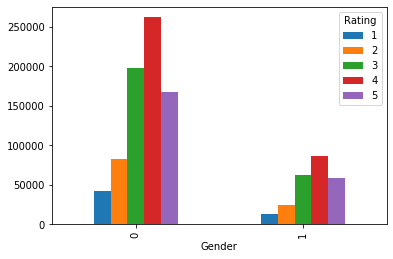

In [51]:
df_master.groupby(['Gender', 'Rating']).size().sort_values(ascending=False).unstack().plot(kind='bar', legend=True)
plt.show()

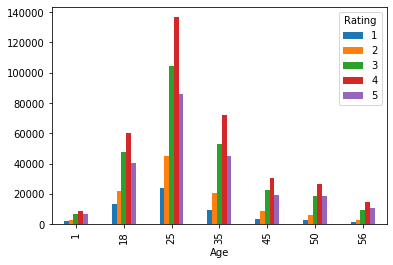

In [52]:
df_master.groupby(['Age', 'Rating']).size().sort_values(ascending=False).unstack().plot(kind='bar', legend=True)
plt.show()

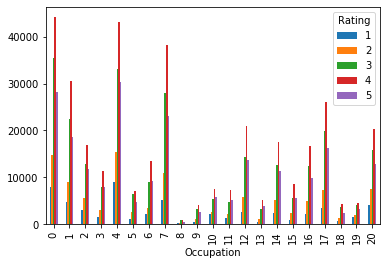

In [53]:
df_master.groupby(['Occupation', 'Rating']).size().sort_values(ascending=False).unstack().plot(kind='bar', legend=True)
plt.show()

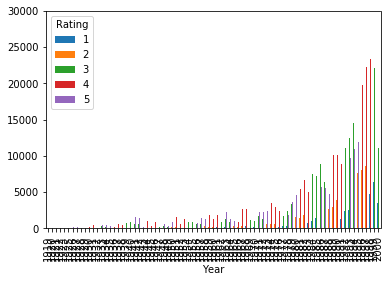

In [54]:
df_master.groupby(['Year', 'Rating']).size().sort_values(ascending=False).unstack().plot(kind='bar', legend=True)
plt.show()

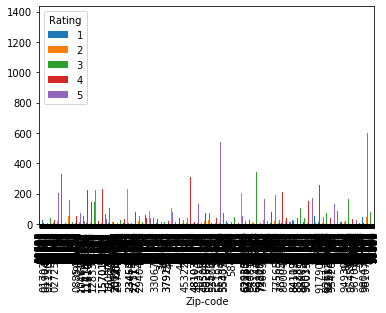

In [55]:
df_master.groupby(['Zip-code', 'Rating']).size().sort_values(ascending=False).unstack().plot(kind='bar', legend=True)
plt.show()

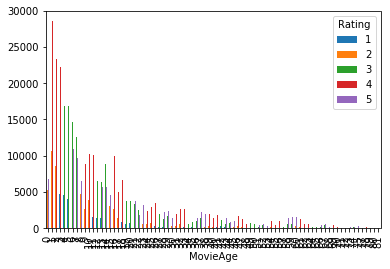

In [56]:
df_master.groupby(['MovieAge', 'Rating']).size().sort_values(ascending=False).unstack().plot(kind='bar', legend=True)
plt.show()

# Develop an appropriate model to predict the movie ratings

In [57]:
# Let's take first 1000 records to train different models
sample_1000records = df_master[0:1000]

In [58]:
sample_1000records

,MovieID,Title,Genre,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,MovieAge
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2384,Babe: Pig in the City (1998),Children's|Comedy,18,2,978155233,1,18,3,95825,...,0,0,0,0,0,0,0,0,1998,2
996,2391,"Simple Plan, A (1998)",Crime|Thriller,18,1,978155685,1,18,3,95825,...,0,0,0,0,0,1,0,0,1998,2
997,2394,"Prince of Egypt, The (1998)",Animation|Musical,18,4,978154907,1,18,3,95825,...,0,1,0,0,0,0,0,0,1998,2
998,2402,Rambo: First Blood Part II (1985),Action|War,18,2,978153894,1,18,3,95825,...,0,0,0,0,0,0,1,0,1985,15


In [59]:
# From the dataset extract useful information
features = sample_1000records[['MovieID', 'Age', 'Occupation']].values

In [60]:
features

array([[   1,    1,   10],
       [  48,    1,   10],
       [ 150,    1,   10],
       ...,
       [2394,   18,    3],
       [2402,   18,    3],
       [2404,   18,    3]], dtype=int64)

In [61]:
target_response = sample_1000records['Rating'].values

In [62]:
target_response

array([5, 5, 5, 4, 5, 4, 4, 4, 5, 4, 3, 3, 3, 4, 3, 4, 4, 5, 5, 5, 5, 4,
       5, 3, 4, 4, 5, 5, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 3, 3, 5, 4, 3, 4,
       4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 5, 4, 2, 4, 4, 3, 4, 4, 4,
       3, 4, 5, 4, 4, 5, 4, 3, 4, 4, 5, 4, 5, 4, 4, 3, 3, 5, 4, 4, 4, 4,
       5, 3, 5, 3, 4, 3, 4, 3, 3, 3, 4, 5, 3, 3, 4, 1, 5, 4, 5, 5, 5, 3,
       3, 4, 5, 4, 4, 3, 5, 3, 4, 3, 3, 4, 4, 5, 4, 3, 4, 4, 4, 4, 5, 4,
       3, 3, 5, 4, 4, 5, 5, 4, 4, 3, 5, 4, 5, 4, 4, 4, 3, 5, 5, 5, 3, 4,
       4, 2, 3, 5, 3, 5, 3, 3, 3, 5, 4, 3, 4, 5, 5, 5, 5, 3, 5, 5, 4, 3,
       4, 4, 5, 5, 5, 3, 4, 5, 5, 4, 3, 3, 4, 4, 4, 3, 5, 5, 3, 5, 5, 4,
       3, 4, 5, 3, 5, 4, 4, 3, 2, 4, 4, 5, 3, 3, 5, 3, 3, 5, 3, 3, 2, 3,
       5, 3, 5, 5, 2, 4, 2, 3, 5, 2, 4, 3, 5, 5, 3, 3, 5, 3, 5, 3, 4, 5,
       5, 3, 3, 2, 4, 3, 4, 3, 3, 5, 3, 4, 3, 5, 5, 3, 3, 3, 4, 3, 4, 5,
       4, 4, 5, 4, 3, 4, 4, 4, 5, 4, 3, 3, 3, 3, 5, 4, 3, 4, 5, 5, 5, 5,
       3, 4, 4, 4, 5, 3, 3, 2, 4, 3, 4, 4, 4, 4, 4,

In [63]:
# Import Required library for divide dataset into testing and tarining data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target_response)

In [64]:
#Look at the shape of each dataset
x_train.shape

(750, 3)

In [65]:
x_test.shape

(250, 3)

In [66]:
y_train.shape

(750,)

In [67]:
y_test.shape

(250,)

In [68]:
x_train

array([[  62,   35,    1],
       [ 745,   25,   17],
       [2077,   35,    1],
       ...,
       [1918,   18,    3],
       [ 971,   35,    1],
       [  17,   50,    9]], dtype=int64)

In [69]:
y_train

array([5, 4, 3, 3, 4, 4, 3, 4, 3, 3, 4, 5, 5, 4, 3, 4, 2, 5, 5, 3, 5, 5,
       5, 4, 4, 4, 4, 4, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 4, 4, 5, 3, 5,
       5, 2, 4, 4, 4, 3, 3, 5, 5, 4, 3, 4, 5, 3, 4, 4, 3, 3, 3, 4, 3, 3,
       4, 3, 5, 4, 5, 4, 5, 3, 5, 2, 2, 5, 5, 5, 4, 5, 4, 5, 1, 1, 4, 5,
       5, 4, 3, 4, 3, 5, 3, 5, 5, 3, 5, 5, 5, 5, 5, 4, 3, 4, 3, 3, 4, 5,
       5, 4, 5, 4, 5, 4, 4, 3, 5, 3, 5, 3, 3, 5, 4, 3, 4, 4, 5, 4, 4, 5,
       4, 5, 4, 3, 3, 4, 5, 4, 1, 4, 2, 4, 4, 3, 5, 4, 3, 3, 3, 4, 5, 4,
       5, 5, 4, 5, 3, 5, 3, 2, 5, 5, 4, 3, 4, 4, 3, 5, 5, 4, 4, 4, 4, 4,
       3, 4, 5, 4, 4, 5, 4, 3, 3, 5, 4, 3, 3, 4, 5, 3, 5, 5, 4, 3, 4, 4,
       3, 5, 5, 3, 3, 5, 5, 4, 3, 5, 4, 5, 3, 4, 3, 1, 2, 5, 5, 4, 3, 4,
       2, 5, 3, 3, 3, 5, 3, 3, 5, 5, 3, 4, 4, 3, 4, 4, 5, 4, 4, 5, 2, 5,
       2, 5, 3, 5, 3, 4, 3, 5, 3, 3, 5, 4, 4, 3, 3, 2, 4, 5, 5, 3, 4, 4,
       3, 3, 5, 3, 5, 3, 4, 5, 3, 5, 5, 4, 5, 3, 4, 5, 5, 2, 3, 1, 4, 3,
       4, 3, 4, 2, 4, 4, 5, 4, 5, 5, 5, 2, 5, 5, 5,

In [70]:
x_test

array([[2108,   35,    1],
       [3066,   35,    1],
       [2797,   35,    1],
       [2253,   18,    3],
       [1101,   50,    9],
       [3534,   50,    9],
       [ 405,   18,    3],
       [2746,   35,    1],
       [2137,   35,    1],
       [2396,   50,    9],
       [1688,   50,    9],
       [2336,   18,    3],
       [ 527,    1,   10],
       [ 589,   18,    3],
       [1517,   35,    1],
       [1256,   35,    1],
       [1198,   18,    3],
       [1186,   18,    3],
       [3100,   35,    1],
       [1923,   35,    1],
       [ 277,   35,    1],
       [2294,   18,    3],
       [2355,   18,    3],
       [2702,   25,   12],
       [2712,   25,   12],
       [1310,   25,   17],
       [2018,   35,    1],
       [1912,   25,   17],
       [1257,   35,    1],
       [2167,   18,    3],
       [2017,   50,    9],
       [2116,   18,    3],
       [1954,   35,    1],
       [ 493,   18,    3],
       [2153,   18,    3],
       [1185,   18,    3],
       [2294,    1,   10],
 

In [71]:
y_test

array([5, 2, 5, 1, 4, 4, 1, 5, 4, 4, 5, 5, 5, 5, 3, 3, 5, 1, 3, 5, 3, 4,
       5, 3, 3, 3, 4, 3, 5, 4, 3, 4, 3, 3, 3, 5, 4, 4, 3, 4, 4, 5, 5, 4,
       3, 4, 4, 1, 5, 4, 4, 2, 5, 2, 4, 4, 5, 2, 4, 5, 4, 5, 1, 5, 5, 5,
       4, 3, 4, 5, 1, 4, 4, 3, 4, 5, 5, 4, 4, 4, 5, 5, 4, 5, 4, 5, 5, 4,
       4, 3, 5, 3, 2, 4, 3, 4, 5, 4, 4, 4, 4, 3, 3, 4, 4, 5, 3, 5, 3, 5,
       4, 4, 3, 4, 4, 5, 3, 4, 3, 4, 3, 1, 3, 4, 4, 5, 4, 5, 4, 5, 3, 4,
       5, 5, 5, 4, 4, 3, 5, 5, 4, 5, 3, 2, 4, 2, 3, 4, 5, 4, 5, 5, 5, 4,
       4, 5, 4, 4, 3, 4, 5, 5, 5, 5, 4, 4, 5, 5, 4, 4, 3, 4, 3, 3, 5, 4,
       3, 5, 5, 3, 3, 4, 4, 4, 4, 5, 4, 4, 4, 4, 3, 3, 5, 2, 5, 5, 5, 3,
       5, 4, 1, 5, 5, 4, 3, 4, 4, 5, 3, 1, 5, 5, 3, 5, 3, 3, 2, 4, 4, 5,
       5, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 4, 4, 4, 3, 3, 2, 4, 5, 5, 4, 5,
       5, 5, 4, 4, 4, 3, 1, 4], dtype=int64)

# Logistic Regression

In [72]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
y_prediction = logReg.predict(x_test)
accuracy_logReg = logReg.score(x_train, y_train) * 100
accuracy_logReg

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


37.333333333333336

# K Nearest Neighbours

In [73]:
# K Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_prediction - knn.predict(x_test)
accuracy_knn = knn.score(x_train, y_train) * 100
accuracy_knn

60.266666666666666

# Gaussian Naive Bayes

In [74]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_prediction = gaussian.predict(x_test)
accuracy_gaussian = gaussian.score(x_train, y_train) * 100
accuracy_gaussian

34.13333333333333

# Decision Tree

In [75]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_prediction = decision_tree.predict(x_test)
accuracy_decision_tree = decision_tree.score(x_train, y_train) * 100
accuracy_decision_tree

100.0

# Random Forest Classifier

In [76]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
ranForest = RandomForestClassifier()
ranForest.fit(x_train, y_train)
y_prediction = ranForest.predict(x_test)
accuracy_ranForest = ranForest.score(x_train, y_train) * 100
accuracy_ranForest

100.0

# Final Result and Choose the Model for prediction

In [77]:
# Now let's visualize which model is better
model = {'Model' : ['Logistic Regression', 'K Nearest Neighbour', 'Gaussian Naive Bayes', 'Decision Tree', 'Rain Forest'],
         'Accuracy' : [accuracy_logReg, accuracy_knn, accuracy_gaussian, accuracy_decision_tree, accuracy_ranForest]}

df_finalResults = pd.DataFrame(model)
df_finalResults

,Model,Accuracy
0,Logistic Regression,37.333333
1,K Nearest Neighbour,60.266667
2,Gaussian Naive Bayes,34.133333
3,Decision Tree,100.000000
4,Rain Forest,100.000000


In [78]:
df_finalResults.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
3,Decision Tree,100.000000
4,Rain Forest,100.000000
1,K Nearest Neighbour,60.266667
0,Logistic Regression,37.333333
2,Gaussian Naive Bayes,34.133333


# Thank You